## Some Python to plot and process model output

- Cartopy
- Xarray

In [1]:
# load libraries for maps
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature


### plot a global map

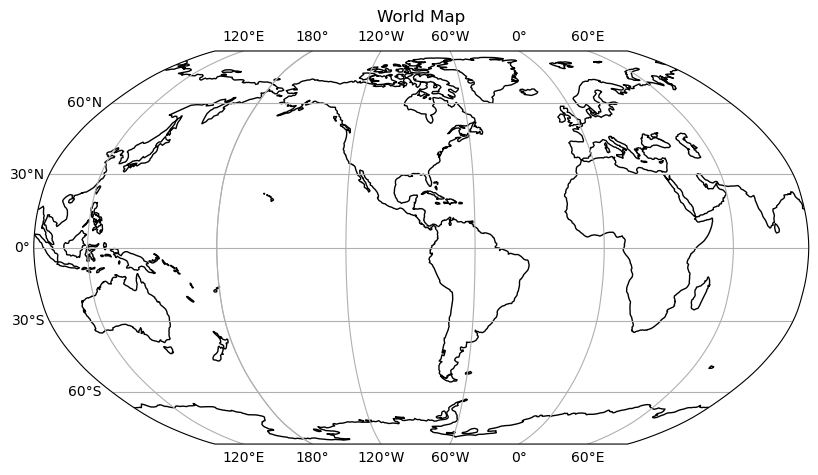

In [3]:
fig = plt.figure(figsize=(10, 8))

ax = plt.axes(projection=ccrs.Robinson(central_longitude=-85))

ax.coastlines()

plt.title('World Map')

grid = ax.gridlines(draw_labels=True)

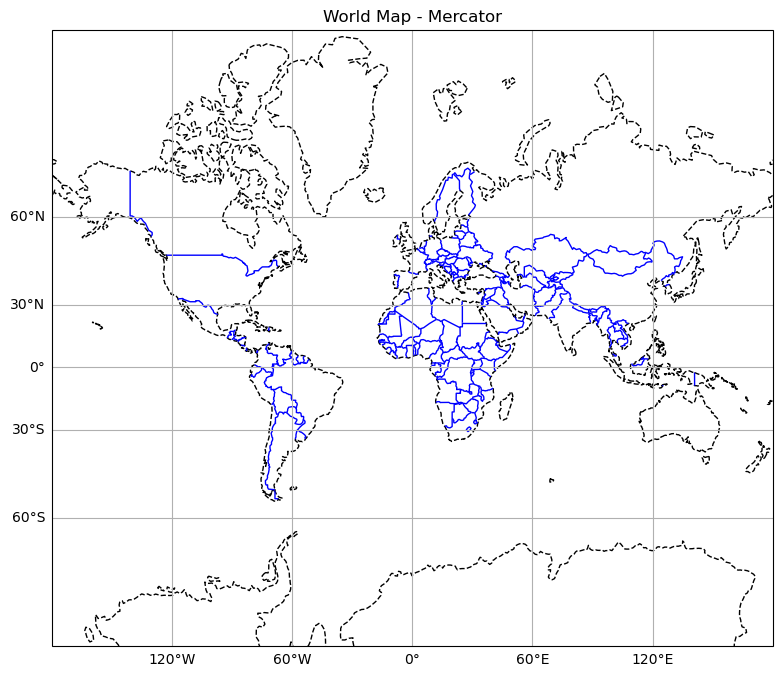

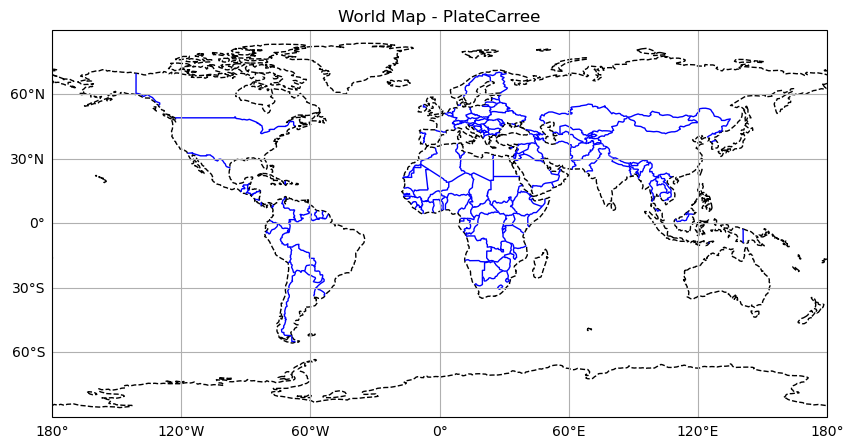

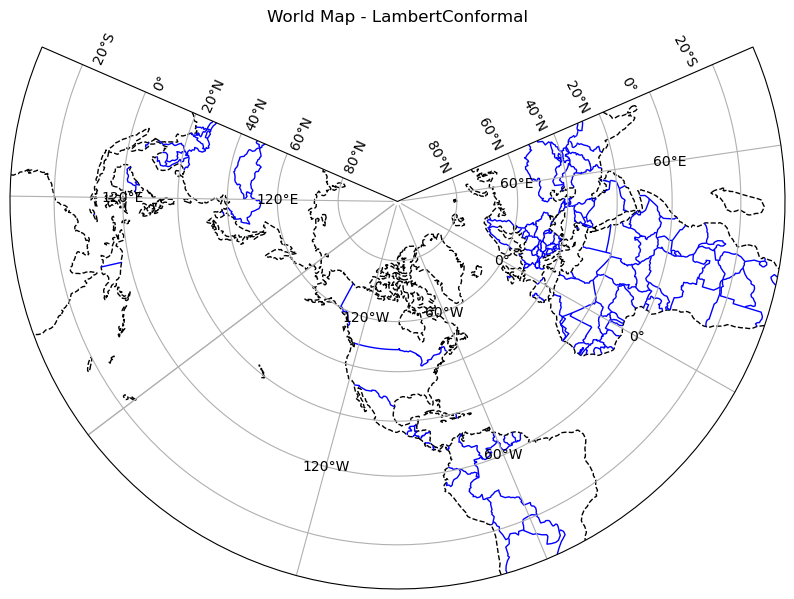

In [4]:
## different projections can be used
## https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

projections = [
    ccrs.Mercator(),
    ccrs.PlateCarree(),
    ccrs.LambertConformal(),
]

for proj in projections:
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=proj)

    # Add coastlines and borders
    ax.coastlines(color='black',linestyle='--')
    ax.add_feature(cfeature.BORDERS, edgecolor='blue')

    # Add gridlines
    grid = ax.gridlines(draw_labels=True)
    grid.right_labels = False
    grid.top_labels = False

    plt.title(f'World Map - {proj.__class__.__name__}')
    plt.show()

### plot a region of interest

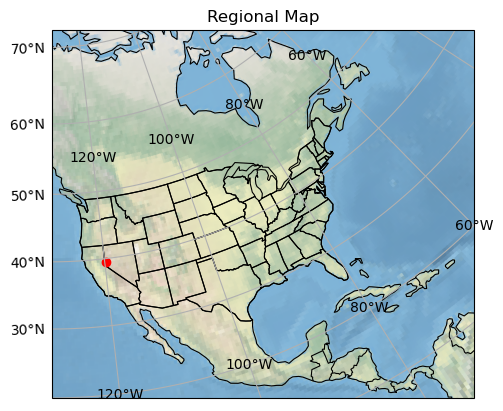

In [2]:
## plot a regional map and 
## add a point/points

lon_min = -130
lon_max = -60
lat_min = 20
lat_max = 60


# point, for more points separate points with ,
lons = [-119.8138]
lats = [39.5296]

# a Lambert projection using ref lat and lon from namelist.wps
projection = ccrs.LambertConformal(central_longitude=-130.392, central_latitude=35.174)

fig, ax = plt.subplots(
    figsize=(8, 4), 
    subplot_kw={"projection": projection}, 
    constrained_layout=True
)

## bounding box limits
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

# adds background image
ax.stock_img()

# add coastline, states and borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)

## add points, need to be transformed, point has geographic coordinates
plt.plot(lons, lats, 'ro', transform=ccrs.PlateCarree())
    
grid = ax.gridlines(draw_labels=True)
grid.right_labels = False
grid.top_labels = False

plt.title('Regional Map')

plt.show()

### We can also add model data as contours / colored pixels

### Xarray is a library for working with labeled, multi-dimensional arrays, handling different file formats common in geosciences

In [2]:
import xarray as xr
import glob
import os
import numpy as np


In [3]:
# directory
wrf_path = '/glade/derecho/scratch/jhenao/atm746/ar_mp9_bl8/'

file_list = sorted(glob.glob(wrf_path+"wrfout_d02*"))

ds = xr.open_dataset(file_list[48])

ds

<xarray.Dataset> Size: 555MB
Dimensions:                (Time: 1, south_north: 324, west_east: 282,
                            bottom_top: 47, bottom_top_stag: 48,
                            soil_layers_stag: 4, west_east_stag: 283,
                            south_north_stag: 325, seed_dim_stag: 2)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 365kB ...
    XLONG                  (Time, south_north, west_east) float32 365kB ...
    XTIME                  (Time) datetime64[ns] 8B ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 367kB ...
    XLONG_U                (Time, south_north, west_east_stag) float32 367kB ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 367kB ...
    XLONG_V                (Time, south_north_stag, west_east) float32 367kB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, seed_dim_stag
Data variables: (12/215)
    Times                  (Time) |S19 19B ...
    LU_INDEX               (Time, south_north, west_east) float32 365kB ...
    ZNU                    (Time, bottom_top) float32 188B ...
    ZNW                    (Time, bottom_top_stag) float32 192B ...
    ZS                     (Time, soil_layers_stag) float32 16B ...
    DZS                    (Time, soil_layers_stag) float32 16B ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 365kB ...
    PC                     (Time, south_north, west_east) float32 365kB ...
    LANDMASK               (Time, south_north, west_east) float32 365kB ...
    LAKEMASK               (Time, south_north, west_east) float32 365kB ...
    SST                    (Time, south_north, west_east) float32 365kB ...
    SST_INPUT              (Time, south_north, west_east) float32 365kB ...
Attributes: (12/136)
    TITLE:                            OUTPUT FROM WRF V4.7.1 MODEL
    START_DATE:                      2024-11-19_12:00:00
    SIMULATION_START_DATE:           2024-11-18_12:00:00
    WEST-EAST_GRID_DIMENSION:        283
    SOUTH-NORTH_GRID_DIMENSION:      325
    BOTTOM-TOP_GRID_DIMENSION:       48
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [7]:
# names of dimensiones
ds.dims

FrozenMappingWarningOnValuesAccess({'Time': 1, 'south_north': 324, 'west_east': 282, 'bottom_top': 47, 'bottom_top_stag': 48, 'soil_layers_stag': 4, 'west_east_stag': 283, 'south_north_stag': 325, 'seed_dim_stag': 2})

In [9]:
# names of coordinates
ds.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 365kB ...
    XLONG    (Time, south_north, west_east) float32 365kB ...
    XTIME    (Time) datetime64[ns] 8B ...
    XLAT_U   (Time, south_north, west_east_stag) float32 367kB ...
    XLONG_U  (Time, south_north, west_east_stag) float32 367kB ...
    XLAT_V   (Time, south_north_stag, west_east) float32 367kB ...
    XLONG_V  (Time, south_north_stag, west_east) float32 367kB ...

In [10]:
# attributes of nc file
ds.attrs

{'TITLE': ' OUTPUT FROM WRF V4.7.1 MODEL',
 'START_DATE': '2024-11-19_12:00:00',
 'SIMULATION_START_DATE': '2024-11-18_12:00:00',
 'WEST-EAST_GRID_DIMENSION': 283,
 'SOUTH-NORTH_GRID_DIMENSION': 325,
 'BOTTOM-TOP_GRID_DIMENSION': 48,
 'DX': 10000.0,
 'DY': 10000.0,
 'AERCU_OPT': 0,
 'AERCU_FCT': 1.0,
 'IDEAL_CASE': 0,
 'DIFF_6TH_SLOPEOPT': 0,
 'AUTO_LEVELS_OPT': 2,
 'DIFF_6TH_THRESH': 0.1,
 'DZBOT': 30.0,
 'DZSTRETCH_S': 1.11,
 'DZSTRETCH_U': 1.1,
 'SKEBS_ON': 0,
 'USE_Q_DIABATIC': 0,
 'GRIDTYPE': 'C',
 'DIFF_OPT': 2,
 'KM_OPT': 4,
 'DAMP_OPT': 3,
 'DAMPCOEF': 0.2,
 'KHDIF': 0.0,
 'KVDIF': 0.0,
 'MP_PHYSICS': 9,
 'RA_LW_PHYSICS': 4,
 'RA_SW_PHYSICS': 4,
 'SF_SFCLAY_PHYSICS': 1,
 'SF_SURFACE_PHYSICS': 2,
 'BL_PBL_PHYSICS': 8,
 'CU_PHYSICS': 11,
 'SF_LAKE_PHYSICS': 0,
 'SURFACE_INPUT_SOURCE': 3,
 'SST_UPDATE': 0,
 'GHG_INPUT': 1,
 'GRID_FDDA': 0,
 'GFDDA_INTERVAL_M': 0,
 'GFDDA_END_H': 0,
 'GRID_SFDDA': 0,
 'SGFDDA_INTERVAL_M': 0,
 'SGFDDA_END_H': 0,
 'HYPSOMETRIC_OPT': 2,
 'USE_THETA_M'

In [68]:
# variables
ds.data_vars

Data variables:
    Times                  (Time) |S19 19B ...
    LU_INDEX               (Time, south_north, west_east) float32 365kB ...
    ZNU                    (Time, bottom_top) float32 188B ...
    ZNW                    (Time, bottom_top_stag) float32 192B ...
    ZS                     (Time, soil_layers_stag) float32 16B ...
    DZS                    (Time, soil_layers_stag) float32 16B ...
    VAR_SSO                (Time, south_north, west_east) float32 365kB ...
    BATHYMETRY_FLAG        (Time) int32 4B ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 17MB ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 17MB ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 18MB ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 18MB ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 18MB ...
    T      

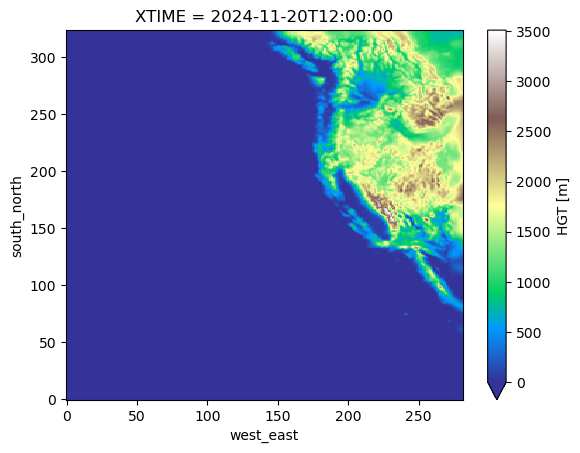

In [5]:
# you can plot values directly, 
#if variable is not 2d it will do different plots,
ds.HGT.plot(cmap='terrain',vmin=0)

### Let's plot surface pressure

In [6]:
# view attributes
ds.PSFC.attrs

{'FieldType': 104,
 'MemoryOrder': 'XY ',
 'description': 'SFC PRESSURE',
 'units': 'Pa',
 'stagger': ''}

In [7]:
## get data for surface presure, lat and lon
sfc_pres = ds.PSFC
sfc_pres2 = ds.PSFC.squeeze()
sfc_pres3 = ds.PSFC.values

In [18]:
sfc_pres

<xarray.DataArray 'PSFC' (Time: 1, south_north: 324, west_east: 282)> Size: 365kB
array([[[101677.5  , 101678.48 , ..., 101683.41 , 101677.37 ],
        [101680.766, 101681.55 , ..., 101685.266, 101679.33 ],
        ...,
        [101420.125, 101399.08 , ...,  93865.57 ,  93929.66 ],
        [101437.78 , 101416.79 , ...,  93875.305,  93945.82 ]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 365kB ...
    XLONG    (Time, south_north, west_east) float32 365kB ...
    XTIME    (Time) datetime64[ns] 8B ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SFC PRESSURE
    units:        Pa
    stagger:

In [19]:
sfc_pres2

<xarray.DataArray 'PSFC' (south_north: 324, west_east: 282)> Size: 365kB
[91368 values with dtype=float32]
Coordinates:
    XLAT     (south_north, west_east) float32 365kB ...
    XLONG    (south_north, west_east) float32 365kB ...
    XTIME    datetime64[ns] 8B ...
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SFC PRESSURE
    units:        Pa
    stagger:

In [20]:
sfc_pres3

array([[[101677.5  , 101678.48 , 101678.66 , ..., 101688.8  ,
         101683.41 , 101677.37 ],
        [101680.766, 101681.55 , 101680.836, ..., 101690.484,
         101685.266, 101679.33 ],
        [101683.92 , 101684.83 , 101684.37 , ..., 101691.14 ,
         101686.26 , 101680.484],
        ...,
        [101402.664, 101380.92 , 101361.28 , ...,  93830.35 ,
          93884.71 ,  93918.63 ],
        [101420.125, 101399.08 , 101379.586, ...,  93783.586,
          93865.57 ,  93929.66 ],
        [101437.78 , 101416.79 , 101396.31 , ...,  93814.61 ,
          93875.305,  93945.82 ]]], dtype=float32)

In [8]:
lon = ds.XLONG.squeeze()
lat = ds.XLAT.squeeze()

In [9]:
ps_hpa = sfc_pres2 / 100.
ps_hpa.max()

<xarray.DataArray 'PSFC' ()> Size: 8B
array(1034.7467041)
Coordinates:
    XTIME    datetime64[ns] 8B ...

In [10]:
time = ds['XTIME']
time_str = time.dt.strftime("%Y-%m-%d %H:%M:%S").values[0]
var = ds.PSFC.description
units = 'hPa' # we converted from original Pa to hPa

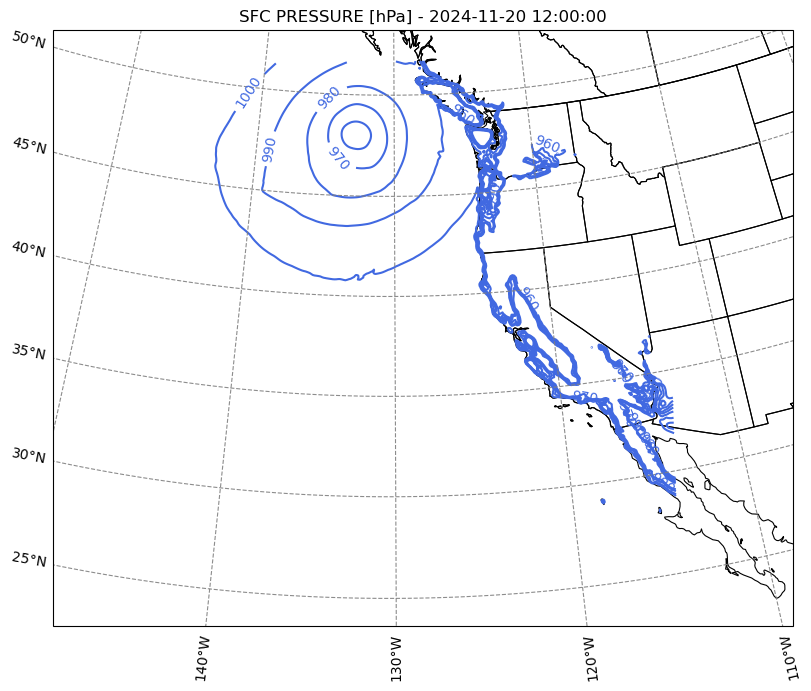

In [11]:
## plot a regional map and 
## add contour lines

lon_min = lon.min()
lon_max = lon.max()
lat_min = lat.min()
lat_max = lat.max()



## levels for pressure
levs_p = np.arange(960,1010,10)

# a Lambert projection using ref lat and lon from namelist.wps
projection = ccrs.LambertConformal(central_longitude=-130.392, central_latitude=35.174)

fig, ax = plt.subplots(
    figsize=(8, 8), 
    subplot_kw={"projection": projection}, 
    constrained_layout=True
)

## bounding box limits
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

# add coastline, states and borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)

# add contour lines
contours = ax.contour(
    lon, lat, ps_hpa,
    levels=levs_p,
    colors='royalblue',
    transform=ccrs.PlateCarree()
)

# Add labels to contour lines
ax.clabel(contours, fmt='%.i', fontsize=10) 

    
grid = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                    color='gray', alpha=0.9, linestyle='--')

grid.top_labels = False
grid.right_labels = False


ax.set_title(f"{var} [{units}] - {time_str}")

plt.show()

In [12]:
# precip

precip = ds.RAINNC + ds.RAINC
precip = precip.squeeze()

var = ds.RAINNC.description
units = ds.RAINNC.units # we converted from original Pa to hPa

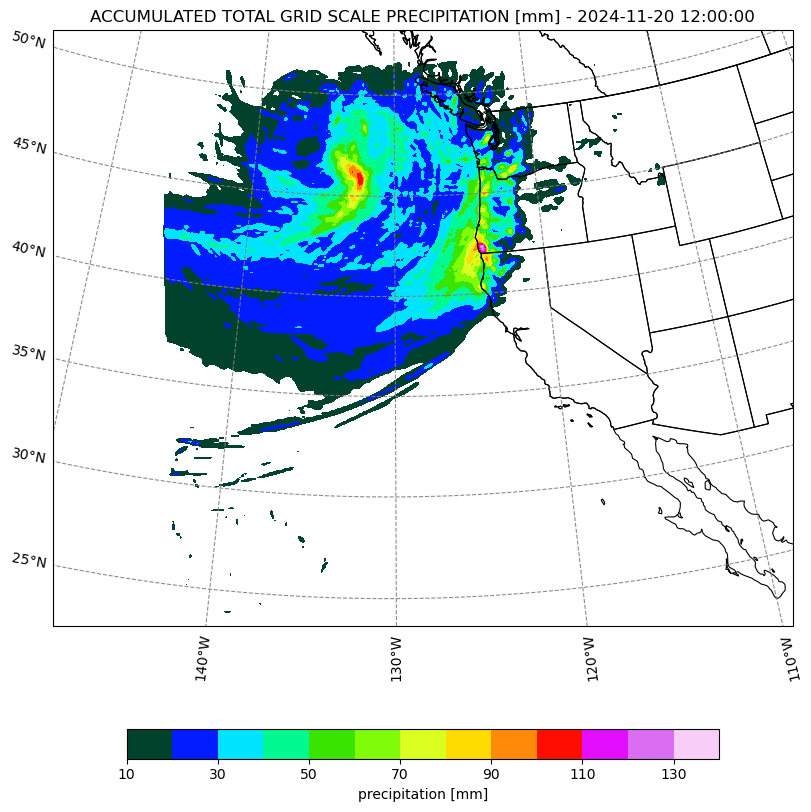

In [13]:

## plot a regional map and 
## add contour shaded plots

lon_min = lon.min()
lon_max = lon.max()
lat_min = lat.min()
lat_max = lat.max()



## levels for precip
levs_p = np.arange(10,150,10)

# a Lambert projection using ref lat and lon from namelist.wps
projection = ccrs.LambertConformal(central_longitude=-130.392, central_latitude=35.174)

fig, ax = plt.subplots(
    figsize=(8, 8), 
    subplot_kw={"projection": projection}, 
    constrained_layout=True
)

## bounding box limits
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

# add coastline, states and borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)

# add contour lines
p = ax.contourf(
    lon, lat, precip,
    levels=levs_p,
    cmap='gist_ncar',
    transform=ccrs.PlateCarree()
)


cbar = fig.colorbar(p, ax=ax, orientation='horizontal', pad=0.07, shrink=0.8)
cbar.set_label('precipitation [mm]')

grid = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                    color='gray', alpha=0.9, linestyle='--')

grid.top_labels = False
grid.right_labels = False


ax.set_title(f"{var} [{units}] - {time_str}")

plt.show()

In [14]:
# winds

u = ds.U.squeeze()
v = ds.V.squeeze()
u

<xarray.DataArray 'U' (bottom_top: 47, south_north: 324, west_east_stag: 283)> Size: 17MB
[4309524 values with dtype=float32]
Coordinates:
    XTIME    datetime64[ns] 8B 2024-11-20T12:00:00
    XLAT_U   (south_north, west_east_stag) float32 367kB ...
    XLONG_U  (south_north, west_east_stag) float32 367kB ...
Dimensions without coordinates: bottom_top, south_north, west_east_stag
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  x-wind component
    units:        m s-1
    stagger:      X

In [ ]:
#destagger winds - u in the east_west direction and v in the south_north direction
um = (u[:,:,:-1] + u[:,:,1:]) / 2.
vm = (v[:,:-1,:] + v[:,1:,:]) / 2.

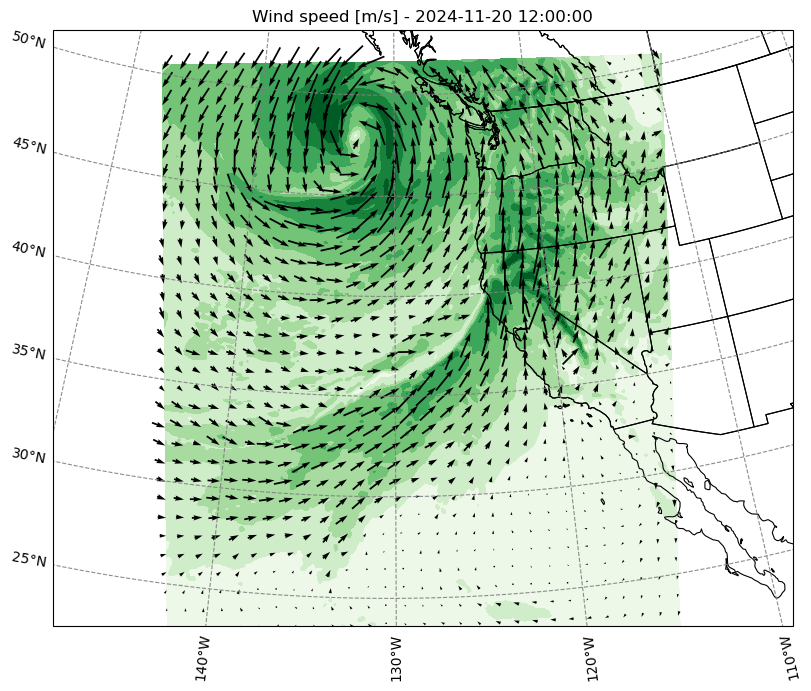

In [ ]:

## plot a regional map and 
## add contour shaded plots

lon_min = lon.min()
lon_max = lon.max()
lat_min = lat.min()
lat_max = lat.max()

## plot every skip vector
skip = 10
## plot vertical level 15
zlev = 15

# compute wind speed
ws = np.sqrt(um.values[zlev,:]**2 + vm.values[zlev,:]**2)

# a Lambert projection using ref lat and lon from namelist.wps
projection = ccrs.LambertConformal(central_longitude=-130.392, central_latitude=35.174)

fig, ax = plt.subplots(
    figsize=(8, 8), 
    subplot_kw={"projection": projection}, 
    constrained_layout=True
)

## bounding box limits
ax.set_extent([lon_min, lon_max, lat_min, lat_max]) 

# add coastline, states and borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)

# add contour
ws = ax.contourf(
    lon, lat, ws,
    #levels=levs_p,
    cmap='Greens',
    transform=ccrs.PlateCarree()
)


# add wind vectors
ax.quiver(
    lon.values[::skip, ::skip],
    lat.values[::skip, ::skip],
    um[zlev,::skip, ::skip].values,
    vm[zlev,::skip, ::skip].values,
    transform = ccrs.PlateCarree(),
    color='black',
    pivot = 'tip',
    scale_units='inches',
    scale=100
) 



grid = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                    color='gray', alpha=0.9, linestyle='--')

grid.top_labels = False
grid.right_labels = False


ax.set_title(f"Wind speed [m/s] - {time_str}")

plt.show()

### Lets load multiple files

In [4]:
# mfdataset loads and combine the files
ds_mf = xr.open_mfdataset(file_list[-48:], combine='nested', concat_dim='Time')

In [5]:
ds_mf.RAINNC

<xarray.DataArray 'RAINNC' (Time: 48, south_north: 324, west_east: 282)> Size: 18MB
dask.array<concatenate, shape=(48, 324, 282), dtype=float32, chunksize=(1, 162, 141), chunktype=numpy.ndarray>
Coordinates:
    XLAT     (Time, south_north, west_east) float32 18MB dask.array<chunksize=(1, 162, 141), meta=np.ndarray>
    XLONG    (Time, south_north, west_east) float32 18MB dask.array<chunksize=(1, 162, 141), meta=np.ndarray>
    XTIME    (Time) datetime64[ns] 384B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED TOTAL GRID SCALE PRECIPITATION
    units:        mm
    stagger:

In [11]:
## plot a series
precip_tot = ds_mf.RAINNC + ds_mf.RAINC

pseries = precip_tot[:,202,189].values

In [21]:
tini = ds_mf['XTIME'].dt.strftime("%Y-%m-%d %H:%M:%S").values[0]
tend = ds_mf['XTIME'].dt.strftime("%Y-%m-%d %H:%M:%S").values[-1]

In [38]:
# location of the point
print(f"lat: {ds_mf.XLAT[0,202,189].values}")
print(f"lon: {ds_mf.XLONG[0,202,189].values}")

lat: 40.8614616394043
lon: -122.8367919921875


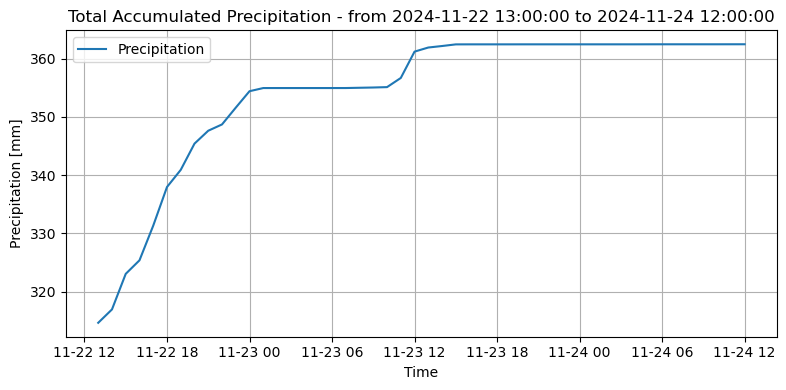

In [32]:
import matplotlib.pyplot as plt

time = ds_mf['XTIME'].values

plt.figure(figsize=(8, 4))
plt.plot(time, pseries, label='Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation [mm]')
plt.title(f"Total Accumulated Precipitation - from {tini} to {tend}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()